Mobius Strip Properties:
-----------------------
Radius (R): 5
Width (w): 3
Resolution (n): 100
Surface Area: 94.43216947983069
Edge Length: 31.7784072350062


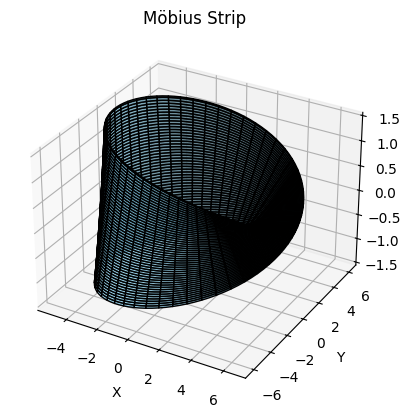

In [12]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R, w, n):  # Fixed: __init__
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.x, self.y, self.z = self._calculate_coordinates()
        self.surface_area = self._calculate_surface_area()
        self.edge_length = self._calculate_edge_length()

    def _calculate_coordinates(self):
        u, v = np.meshgrid(self.u, self.v)
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def _calculate_surface_area(self):
        # Fixed all `*2` → `**2`
        integrand = lambda v, u: np.sqrt(
            ((np.cos(u) * (self.R + v * np.cos(u / 2)) - (v / 2) * np.sin(u / 2) * np.cos(u)) ** 2) +
            ((np.sin(u) * (self.R + v * np.cos(u / 2)) - (v / 2) * np.sin(u / 2) * np.sin(u)) ** 2) +
            ((v / 2) * np.cos(u / 2)) ** 2
        )
        area, _ = dblquad(integrand, 0, 2 * np.pi, lambda u: -self.w/2, lambda u: self.w/2)
        return area

    def _calculate_edge_length(self):
        edge_points = self._calculate_edge_points()
        edge_length = sum(np.linalg.norm(edge_points[i+1] - edge_points[i]) for i in range(len(edge_points) - 1))
        return edge_length

    def _calculate_edge_points(self):
        u = np.linspace(0, 2 * np.pi, self.n)
        v = np.array([-self.w / 2] * self.n)
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return np.column_stack((x, y, z))
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, color='skyblue', edgecolor='k', alpha=0.8)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.show()

if __name__ == '__main__':
    mobius = MobiusStrip(R=5, w=3, n=100)
    print("Mobius Strip Properties:")
    print("-----------------------")
    print("Radius (R):", mobius.R)
    print("Width (w):", mobius.w)
    print("Resolution (n):", mobius.n)
    print("Surface Area:", mobius.surface_area)
    print("Edge Length:", mobius.edge_length)
    mobius.plot()

